# Introduction

In this project, we will predict resturant ratings using Yelp open Dataset. We selected the most relative features from business dataset.  



# Data Clearning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# Import dataset from github
business_url = "https://raw.githubusercontent.com/qiaojunch/cs6140-yelp-proj/main/yelp_academic_dataset_business.csv"
business = pd.read_csv(business_url)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


We will explode the following features for our study:

- stars
- is_open
- state
- city
- review count
- postal_code
- categories
- latitude/longitude
- address

### 1. stars feature




In [5]:
business.stars.value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

In [6]:
business.stars = business.stars.astype('category')

In [7]:
business.stars.describe()

count     150346.0
unique         9.0
top            4.0
freq       31125.0
Name: stars, dtype: float64

In [8]:
business.stars.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

No null values, all values spread among 9 categories

### 2. is_open feature

In [9]:
business.is_open.value_counts()

1    119698
0     30648
Name: is_open, dtype: int64

We are only working with the OPEN business.  

In [10]:
business = business[business.is_open == 1]

### 3. state feature

In [11]:
business.state.value_counts()

PA     26289
FL     21540
TN      9600
IN      8946
MO      8363
AZ      8108
LA      7676
NJ      7031
NV      6277
AB      4346
CA      4065
ID      3783
DE      1894
IL      1765
TX         4
WA         2
MA         2
HI         1
UT         1
CO         1
MI         1
SD         1
XMS        1
VT         1
Name: state, dtype: int64

In [12]:
business[business.state == 'AB'][['name','city', 'state', 'postal_code']]

,name,city,state,postal_code
46,Naked Cyber Cafe & Espresso Bar,Edmonton,AB,T5J 1L7
52,Breadland Organic Whole Grain Bakery,Edmonton,AB,T5K 2T7
77,River City Games,Edmonton,AB,T6E 5B7
187,Tim Hortons,Edmonton,AB,T5S 2X1
203,Ottewell Animal Clinic,Edmonton,AB,T6B 0P2
...,...,...,...,...
150250,Western Canada Fashion Week,Edmonton,AB,T6E 2G9
150263,Citytv,Edmonton,AB,T5J 5A3
150276,Japanese Village,Edmonton,AB,T6J 7C2
150332,Sherwood Park Kwik Lube,Sherwood Park,AB,T8A 4N5


There are some invalid states, such as 'AB', 'XMS'.   We will remove the invalid states from the data.

In [13]:
business = business.drop(business[(business.state == 'AB') | (business.state == 'XMS')].index)

In [14]:
business['state'].isnull().sum()

0

### 4. city feature


In [15]:
business[['city', 'state']].head()

,city,state
1,Affton,MO
3,Philadelphia,PA
4,Green Lane,PA
5,Ashland City,TN
6,Brentwood,MO


In [16]:
business.city = business.city.str.lower()

In [17]:
business['city'].isnull().sum()

0

In [18]:
business.city.value_counts()

philadelphia      10548
tucson             7542
tampa              7236
indianapolis       5896
nashville          5405
                  ...  
phonixville           1
wanamaker             1
boone                 1
roseville             1
upper moreland        1
Name: city, Length: 1170, dtype: int64

### 5. review_count feature

In [19]:
business.review_count.describe()

count    115351.000000
mean         47.704389
std         133.045450
min           5.000000
25%           8.000000
50%          15.000000
75%          38.000000
max        7568.000000
Name: review_count, dtype: float64

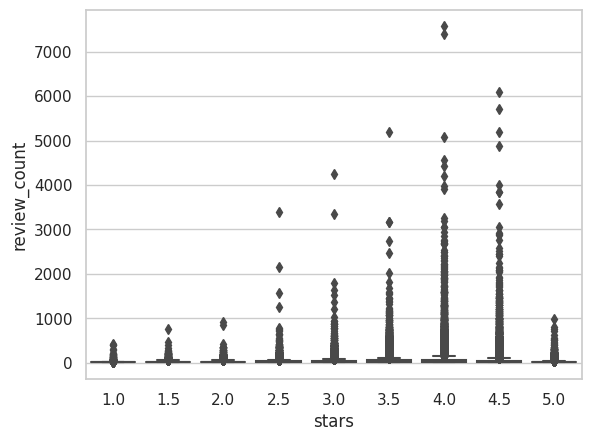

In [20]:
sns_plot = sns.boxplot(x = "stars", y = "review_count", data=business)

<ipython-input-21-b6f763852ff3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(business.review_count)


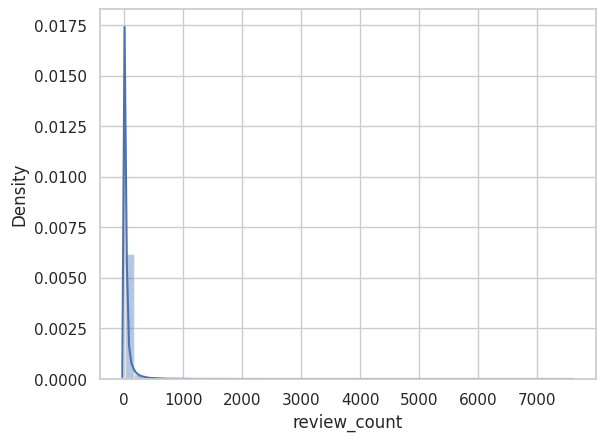

In [21]:
sns_plot = sns.distplot(business.review_count)

In [22]:
business.review_count.quantile([.75, .9, .95, .99, .999, .9999])

0.7500      38.00
0.9000     103.00
0.9500     188.00
0.9900     514.00
0.9990    1615.15
0.9999    4095.72
Name: review_count, dtype: float64

In [23]:
business.review_count.skew()

15.629252449831801

The review_count data has skew value much greater than 1, meaning the distribution is heavily asymmatric.  

Let's see if we can transform the feature to make it more gaussian and better distributed

<ipython-input-24-bf66f857d321>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(np.log10(business.review_count))


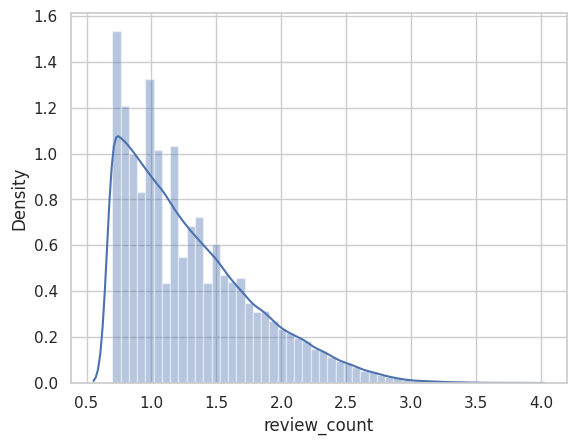

In [24]:
sns_plot = sns.distplot(np.log10(business.review_count))

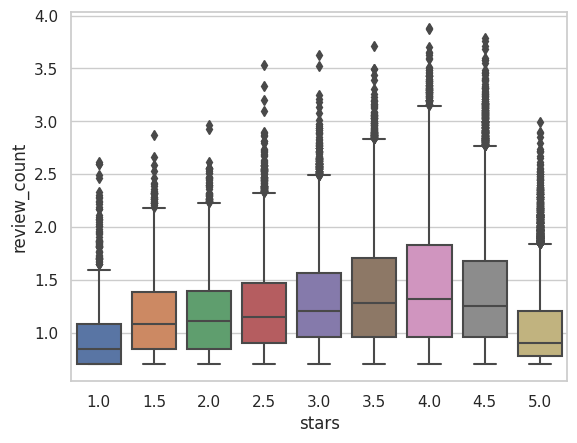

In [25]:
sns_plot = sns.boxplot(x=business.stars, y=np.log10(business.review_count))

As we see above, there are usually lesser number of reviews for very low and very high ratings. The more common star ratings, i.e. 3-4.5 have higher median number of review counts.

In [26]:
np.log10(business.review_count).skew()

0.9799063491001891

Log10 transform of review counts looks like a good valid feature to have. Keeping the transform.  

Making sure correlation with 'stars' remains unaffected before doing the transform.

In [27]:
business.stars.corr(business.review_count)

0.05729255486974097

In [28]:
business.stars.corr(np.log10(business.review_count))

0.040628670967304444

In [29]:
business.review_count = np.log10(business.review_count)

In [30]:
business.review_count = np.log10(business.review_count)

In [31]:
business.review_count.isnull().value_counts()

False    115351
Name: review_count, dtype: int64

### 6. postal_code feature


In [32]:
business.postal_code.head()

1    63123
3    19107
4    18054
5    37015
6    63144
Name: postal_code, dtype: object

In [33]:
business.postal_code.isnull().value_counts()

False    115328
True         23
Name: postal_code, dtype: int64

In [34]:
business[business.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
2617,Ray's Vegan Soul,NaN,st. petersburg,FL
16507,Philadelphia,NaN,philadelphia,PA
17814,Indy 500 Parade,Pennsylvania St,indianapolis,IN
19708,Krewe of Choctaw,NaN,gretna,LA
29821,Krewe of Thoth,St Charles Ae,new orleans,LA


There are 23 businesses whose postal code is none. We can removw the data with invalid postal code.

In [35]:
business = business[pd.notnull(business.postal_code)]
business.postal_code.isnull().value_counts()

False    115328
Name: postal_code, dtype: int64

### 7. categories feature


In [36]:
business.categories.head()

1    Shipping Centers, Local Services, Notaries, Ma...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
5    Burgers, Fast Food, Sandwiches, Food, Ice Crea...
6    Sporting Goods, Fashion, Shoe Stores, Shopping...
Name: categories, dtype: object

In [37]:
business.categories.isnull().value_counts()

False    115234
True         94
Name: categories, dtype: int64

We can drop 94 items that are null values in catagores.

In [38]:
business = business[pd.notnull(business.categories)]

In [39]:
business.categories = business.categories.str.lower()

<ipython-input-39-e69010bee913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business.categories = business.categories.str.lower()


In [40]:
business.categories.str.contains('restaurant|restaurants|food').value_counts()

False    72807
True     42427
Name: categories, dtype: int64

Keeping only food/restaurant related listings for our study.  

In [41]:
business = business[business.categories.str.contains('restaurant|restaurants|food')]

### 8. latitude/longitude feature



In [42]:
business.latitude.isnull().value_counts()

False    42427
Name: latitude, dtype: int64

In [43]:
business.longitude.isnull().value_counts()

False    42427
Name: longitude, dtype: int64

In [44]:
business[['latitude','longitude']].describe()

,latitude,longitude
count,42427.000000,42427.000000
mean,36.159493,-86.861972
std,4.935314,13.119185
min,27.564457,-120.083748
25%,30.038353,-90.120477
50%,38.744076,-82.787425
75%,39.949056,-75.324161
max,43.773686,-74.661348


Got the bounding box i.e. max/min lat longs for continental United States from here
 https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States



In [45]:
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

In [46]:
business[(business.latitude > top) | (business.latitude < bottom) | (business.longitude > right) | (business.longitude < left)].value_counts()

Series([], dtype: int64)

All restuarants on yelp are within the U.S. region.

### 9. address feature


In [47]:
business.address.isnull().value_counts()

False    41875
True       552
Name: address, dtype: int64

In [48]:
business[business.address.isnull()][['name','address','city','state']].head()

,name,address,city,state
11,Vietnamese Food Truck,NaN,tampa bay,FL
93,Impasto,NaN,tampa,FL
252,Scout's Treat Truck,NaN,indianapolis,IN
288,Best Tours,NaN,philadelphia,PA
320,Go! Gyro! Go!,NaN,saint louis,MO


As we see a lot of the places above with null address are actually mobile restaurants, like food trucks etc. Marking all these addresses as 'NOT_AVAILABLE'.

In [49]:
business.address = business.address.fillna('NOT_AVAILABLE')

<ipython-input-49-e0689fa87a7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business.address = business.address.fillna('NOT_AVAILABLE')


In [50]:
business.address = business.address.str.lower()
business.address.isnull().value_counts()

False    42427
Name: address, dtype: int64

In [51]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42427 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   business_id   42427 non-null  object  
 1   name          42427 non-null  object  
 2   address       42427 non-null  object  
 3   city          42427 non-null  object  
 4   state         42427 non-null  object  
 5   postal_code   42427 non-null  object  
 6   latitude      42427 non-null  float64 
 7   longitude     42427 non-null  float64 
 8   stars         42427 non-null  category
 9   review_count  42427 non-null  float64 
 10  is_open       42427 non-null  int64   
 11  attributes    41774 non-null  object  
 12  categories    42427 non-null  object  
 13  hours         38045 non-null  object  
dtypes: category(1), float64(3), int64(1), object(9)
memory usage: 4.6+ MB


### 10. name feature

In [52]:
business.name.head()

3           St Honore Pastries
4     Perkiomen Valley Brewery
5               Sonic Drive-In
9               Sonic Drive-In
11       Vietnamese Food Truck
Name: name, dtype: object

In [53]:
business.name.isnull().value_counts()

False    42427
Name: name, dtype: int64

In [54]:
business.name.str.lower()

3                    st honore pastries
4              perkiomen valley brewery
5                        sonic drive-in
9                        sonic drive-in
11                vietnamese food truck
                      ...              
150325                             wawa
150327                dutch bros coffee
150328             savaya coffee market
150336    adelita taqueria & restaurant
150339                     the plum pit
Name: name, Length: 42427, dtype: object

### 11. joining data: tip


In [55]:
tip_url = "https://media.githubusercontent.com/media/qiaojunch/cs6140-yelp-proj/main/yelp_academic_dataset_tip.csv"
tip = pd.read_csv(tip_url)
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [56]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908910 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [57]:
business = business.merge(tip[['business_id', 'user_id']], left_on='business_id', right_on='business_id', how='left')

In [59]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540452 entries, 0 to 540451
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   business_id   540452 non-null  object  
 1   name          540452 non-null  object  
 2   address       540452 non-null  object  
 3   city          540452 non-null  object  
 4   state         540452 non-null  object  
 5   postal_code   540452 non-null  object  
 6   latitude      540452 non-null  float64 
 7   longitude     540452 non-null  float64 
 8   stars         540452 non-null  category
 9   review_count  540452 non-null  float64 
 10  is_open       540452 non-null  int64   
 11  attributes    539648 non-null  object  
 12  categories    540452 non-null  object  
 13  hours         525703 non-null  object  
 14  user_id       535321 non-null  object  
dtypes: category(1), float64(3), int64(1), object(10)
memory usage: 62.4+ MB


Find all of users who had reviewed the same business, and creat a new column called users.

In [60]:
business = business.merge(business.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(),
               left_on='business_id', right_on='business_id', how='left')

In [63]:
business = business.drop_duplicates(subset='business_id')

In [64]:
business['users'] = business[0]

In [65]:
business = business.drop(['user_id',0], axis=1)

### 12. joining data: review

### 13. joining data: user

In [66]:
user_url = "https://media.githubusercontent.com/media/qiaojunch/cs6140-yelp-proj/main/yelp_academic_dataset_user.csv"
user = pd.read_csv(user_url)
user.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,864655,AE4FFs4eZ_nRLEGMlEV-wg,Hollan,7,2011-04-16 05:17:30,10,1,1,NaN,"OpK4SzQlhPonhQqsD-v_8w, EJjUHlIwHzIP9tzdeGiuwA...",...,0,0,0,0,0,0,0,0,0,0
1,339129,rbUrVvGa4Qx2DuI3s-_45Q,Ashley,43,2015-02-12 02:29:45,11,2,1,NaN,None,...,0,0,0,0,0,0,0,0,0,0
2,847759,D0LQ46gK7eyFAkpDiwBHFw,Donovan,72,2012-07-29 01:09:41,55,14,34,"2019,20,20,2021","f6TF5ggJKZIbIQ4IHObnWg, LoDsRcSF8hHxz9zoj5c0mw...",...,0,0,0,0,2,2,4,4,3,0
3,1425501,4zsXguY3J0bmRtBYyEk2FQ,Eric,1,2016-03-15 00:44:35,0,0,0,NaN,"RZbAYVmO3FnYDdFrEtyRYQ, 56JNNX5pOIpmQD0IhE-msA...",...,0,0,0,0,0,0,0,0,0,0
4,1399585,kt51m2SRcooPmuLAQgXJjw,DANA,2,2009-10-23 09:48:47,45,5,3,NaN,"-SlWJhzUzqUO61vJoKYbOA, k6sXZyNM5XpZxjB8iSPjMQ...",...,1,0,0,0,1,0,0,0,0,0


# Feature Engineering



# Experiments and Results

Models:
- regressions
- decision tree
- random forest

# Data Analysis